# Graficando valores de $c/a$ vs Energía Total por cada volumen dado

In [319]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Definiendo directorio principal

In [320]:
directorio_principal = '/home/marcocarmonaga/Documents/MoB_2-Study-Properties_Quantum_expresso/notebooks-scripts'
os.chdir(directorio_principal)

# Cambiando a carpeta sobre la que se trabajará (directorio secundario)

In [321]:
scf_directory = '../data/processed/scf'
os.chdir(scf_directory)

# Enlistando archivos dentro de la carpeta secundaria

In [322]:
directories = os.listdir()
directories

['110', '0', '120', '90', '70', '80', '65', '130', '150', '140', '50', '100']

# Generando función para graficar

In [323]:
def bands_plot(directorio:str):
    # Abrimos directorio
    os.chdir(directorio)

    # Cargamos archivos a utilizar
    bands_bands_gnu = open('mob2_bands.bands.gnu','r')
    bands_run_out = open('mob2_bands_run.out','r')
    dos_dos = open('mob2_dos.dos','r')

    # Leemos los archivos
    bands_bands_gnu_r = bands_bands_gnu.readlines()
    bands_run_out_r = bands_run_out.readlines()
    dos_dos_r = dos_dos.readlines()

    # Cargando bands_bands_gnu_r a formato correcto
    bands_bands_gnu_arr = np.loadtxt(bands_bands_gnu_r)
    bands_bands_gnu_df = pd.DataFrame(bands_bands_gnu_arr)
    bands_bands_gnu_df.columns = ['x','y']

    # Seleccionando lines correspondiente a los puntos de alta simetría
    high_symmetry_points_lines = bands_run_out_r[40:48]

    # Extrayendo valores de los puntos de alta simetría
    high_symmetry_points = [float(i[65:-1]) for i in high_symmetry_points_lines]

    # Definiendo EFermi value
    EFermi_value = float(dos_dos_r[0][45:-3])

    # Transformando bands_bands_gnu_df.y
    bands_bands_gnu_df.y = bands_bands_gnu_df.y.apply(lambda x : x - EFermi_value)

    # Extrayendo bandas cada una de las 20 bandas en bands_bands_gnu_df
    bandas = [bands_bands_gnu_df.iloc[i*261:(i+1)*261,:] for i in range(20)]

    # Definiendo label de puntos de alta simetría
    ticks = [r"$\mathbb{\Gamma}$",r"M",r"K",r"$\mathbb{\Gamma}$",r"A",r"L",r"H",r"A"]

    # Graficando bandas
    fig, ax = plt.subplots()
    fig.set_size_inches(10,6.6)
    plt.ylim(-10, 10)
    plt.xlim(min(bands_bands_gnu_df.x),max(bands_bands_gnu_df.x))
    for banda in bandas:
        ax.plot(banda.x,banda.y)
    for high_symmetry_point in high_symmetry_points:
        ax.plot([high_symmetry_point,high_symmetry_point],[10,-10],c='gray')
    ax.plot([0,bandas[0].x.max()],[0,0],'--', c='gray')
    ax.set_title(f'{directorio} GPa')
    ax.set_yticks([-10,-5,0,5,10])
    ax.set_ylabel(r"$E-E_{F}(eV)$")
    ax.set_xticks(high_symmetry_points)
    ax.set_xticklabels(ticks)
    plt.savefig(f'/home/marcocarmonaga/Documents/MoB_2-Study-Properties_Quantum_expresso/images/bandas/{directorio}_GPa.png',facecolor='white')
    plt.show()
    

    # Cerramos archivos
    bands_bands_gnu.close()
    bands_run_out.close()
    dos_dos.close()

    # Salimos directorio
    os.chdir('../')

# Generando gráficas de densidad de estado para las diferentes presiones.

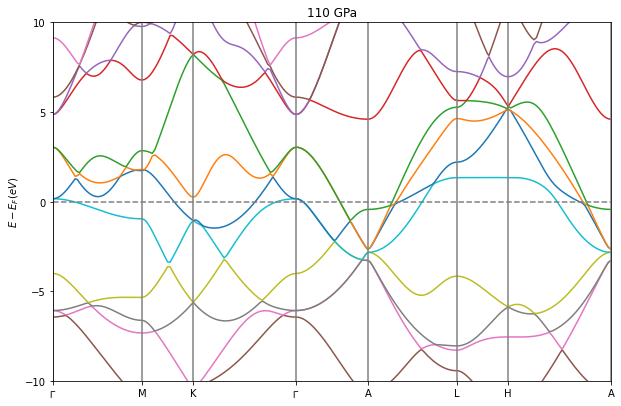

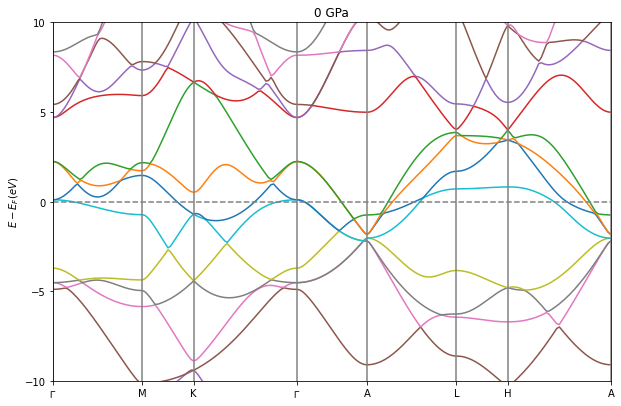

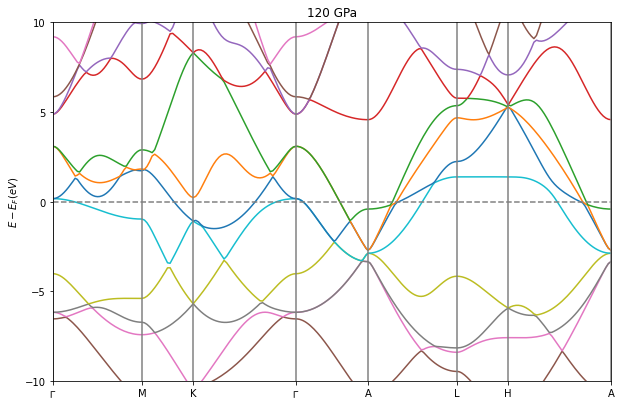

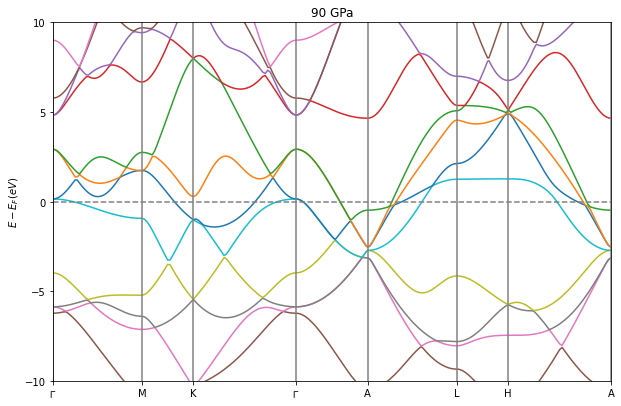

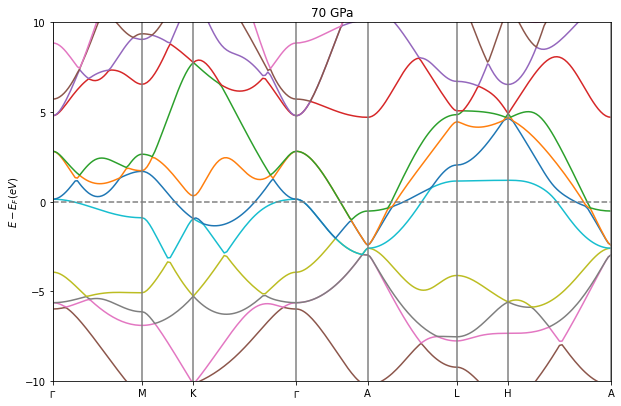

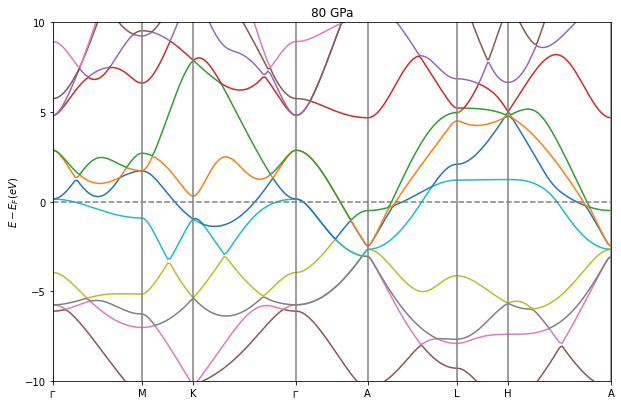

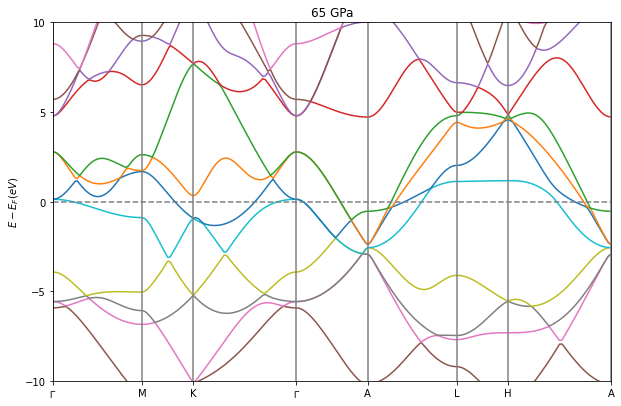

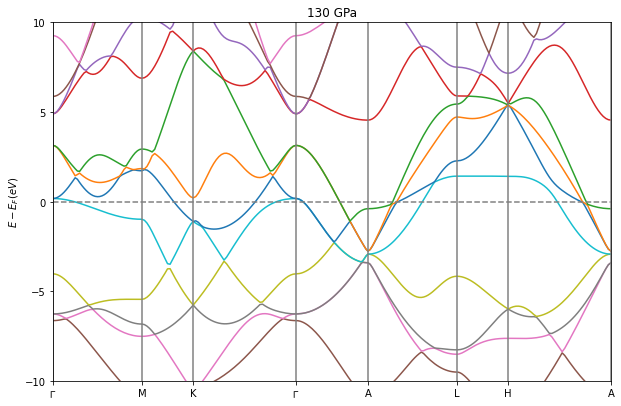

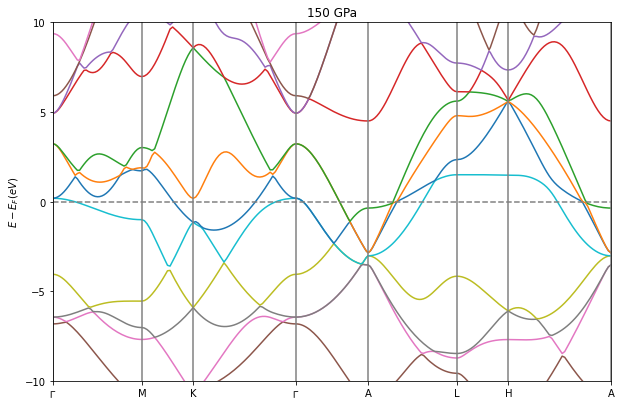

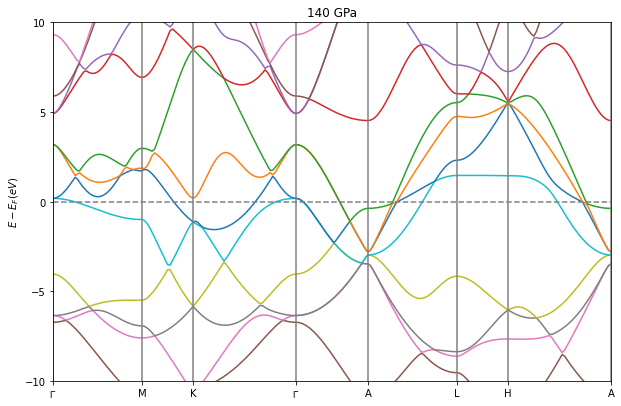

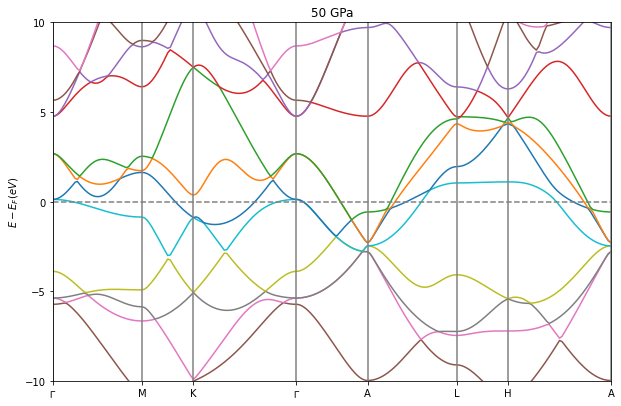

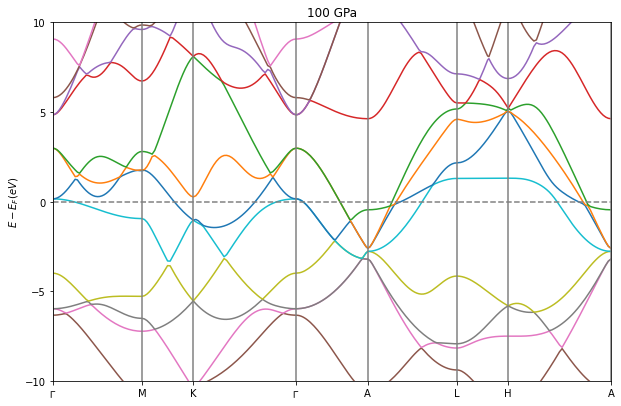

In [324]:
for directory in directories:
    bands_plot(directory)